In [4]:
import pandas as pd
#nazwy kolumn
columns = [
    "subject#",
    "age",
    "test_time",
    "Jitter(%)",
    "Jitter(Abs)",
    "Jitter:RAP",
    "Jitter:PPQ5",
    "Jitter:DDP",
    "Shimmer",
    "Shimmer(dB)",
    "Shimmer:APQ3",
    "Shimmer:APQ5",
    "Shimmer:APQ11",
    "Shimmer:DDA",
    "NHR",
    "HNR",
    "RPDE",
    "DFA",
    "PPE",
    "motor_UPDRS",
    "total_UPDRS",
    "sex"
]
# Ścieżka do pliku CSV
sciezka = 'parkinsons_updrs.csv'

# Wczytywanie pliku CSV do DataFrame
df = pd.read_csv(sciezka)


   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

Liczba skupień: 2, Silhouette Score: 0.68


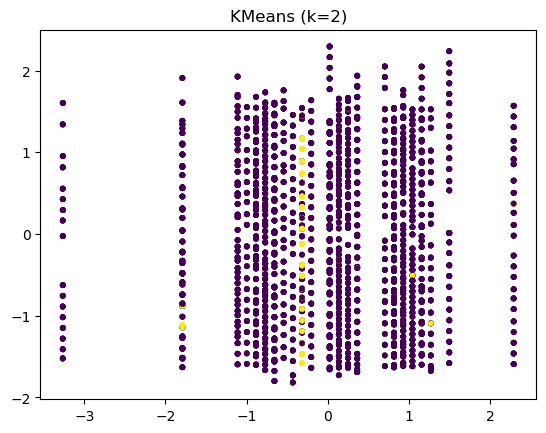

Liczba skupień: 3, Silhouette Score: 0.23


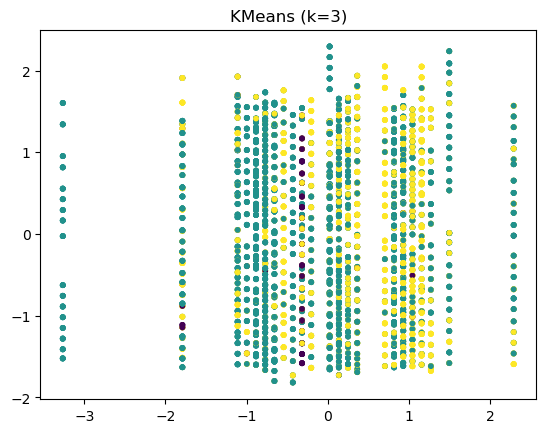

Liczba skupień: 4, Silhouette Score: 0.17


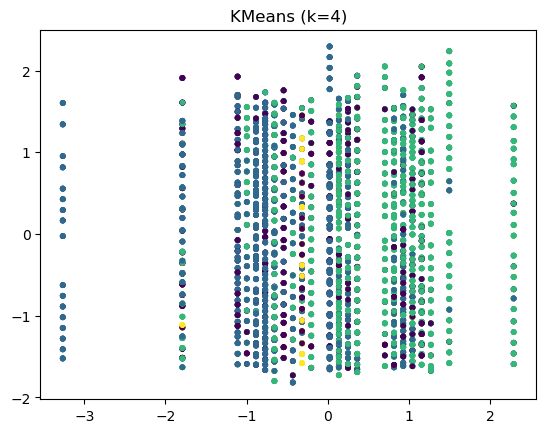

Liczba skupień: 5, Silhouette Score: 0.18


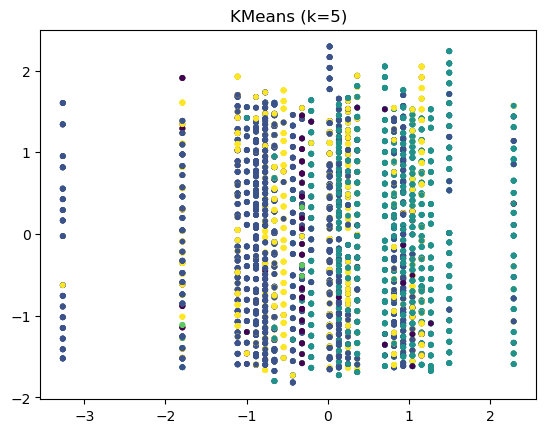

Liczba skupień: 6, Silhouette Score: 0.15


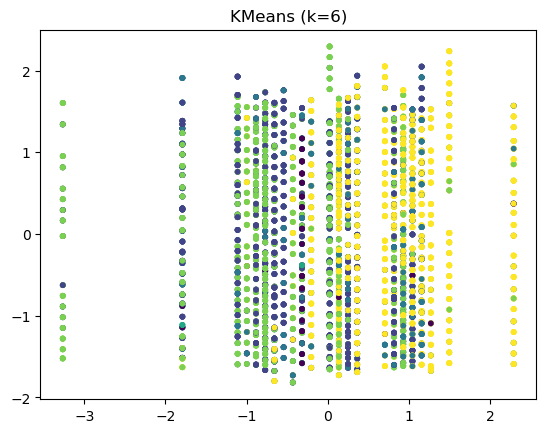

Liczba skupień: 7, Silhouette Score: 0.15


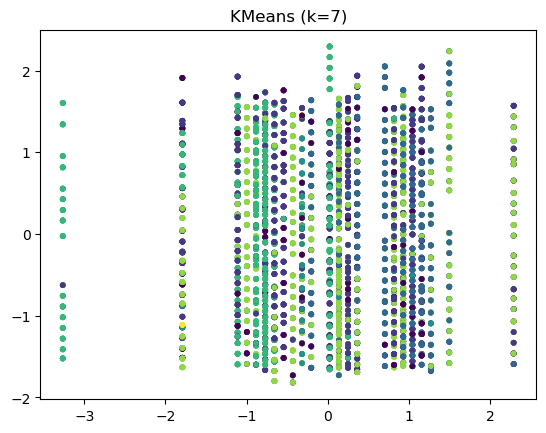

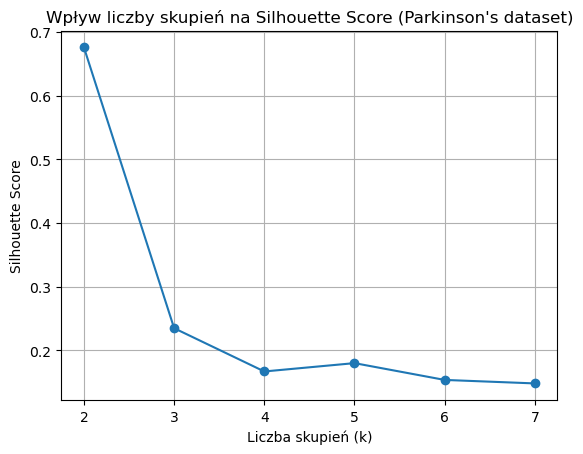

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Przygotowanie danych (usuwamy kolumny nienumeryczne i nieistotne)
X = df.drop(columns=["subject#", "sex"])  # "sex" jest raczej cechą binarną/kategorialną
X_scaled = StandardScaler().fit_transform(X)

# Analiza K-Means dla różnych wartości k
k_values = range(2, 8)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"Liczba skupień: {k}, Silhouette Score: {score:.2f}")

    # Rysujemy tylko na dwóch pierwszych komponentach dla uproszczenia
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f"KMeans (k={k})")
    plt.show()

# Wykres zależności liczby skupień od Silhouette Score
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Wpływ liczby skupień na Silhouette Score (Parkinson's dataset)")
plt.xlabel("Liczba skupień (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

eps=1.0, min_samples=3: Silhouette Score = -0.35, klastry = 93


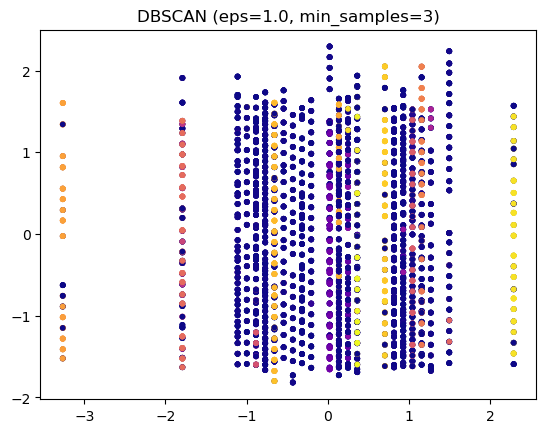

eps=1.0, min_samples=5: Silhouette Score = -0.34, klastry = 58


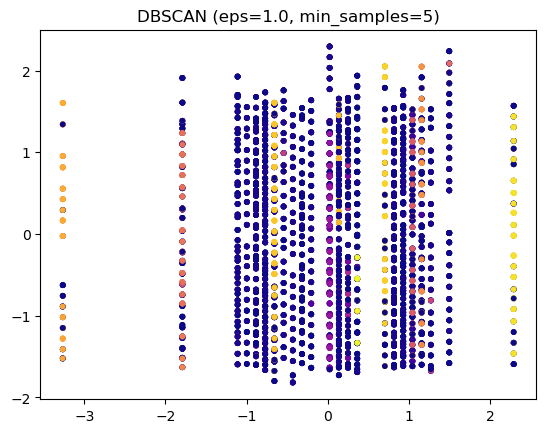

eps=1.0, min_samples=10: Silhouette Score = -0.33, klastry = 40


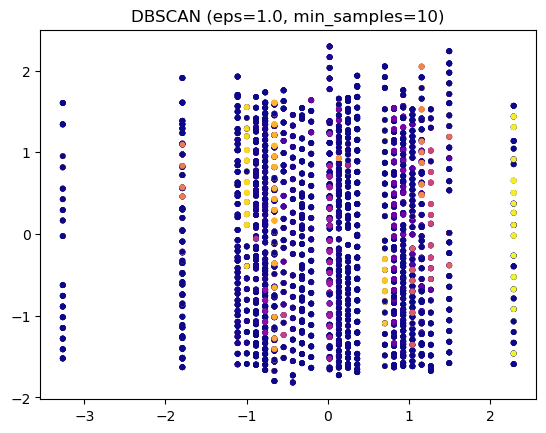

eps=1.5, min_samples=3: Silhouette Score = -0.07, klastry = 11


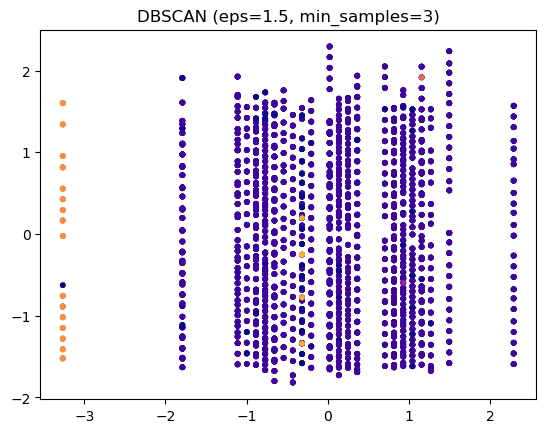

eps=1.5, min_samples=5: Silhouette Score = -0.03, klastry = 6


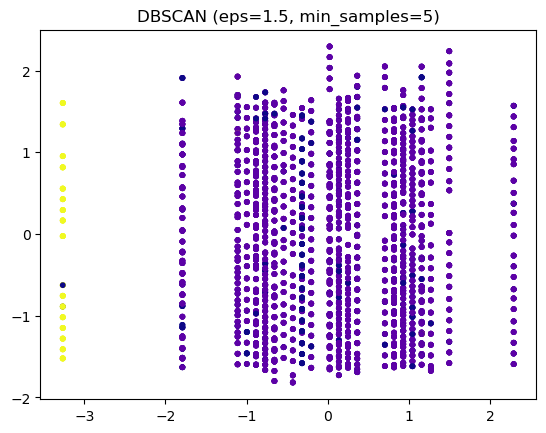

eps=1.5, min_samples=10: Silhouette Score = 0.17, klastry = 2


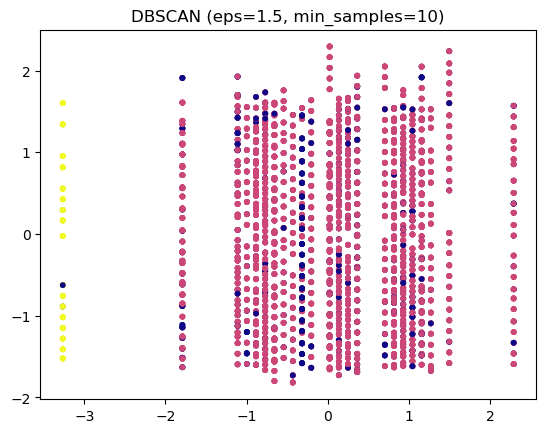

eps=2.0, min_samples=3: Silhouette Score = 0.10, klastry = 8


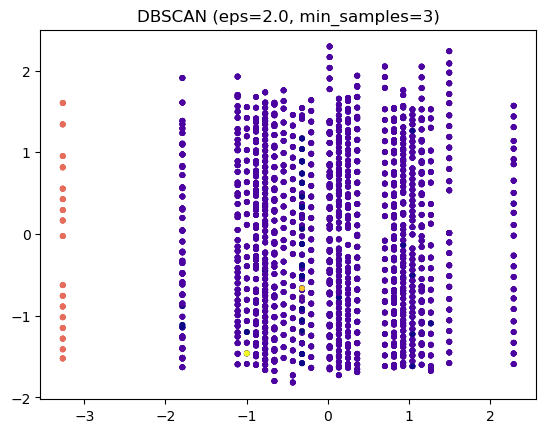

eps=2.0, min_samples=5: Silhouette Score = 0.10, klastry = 4


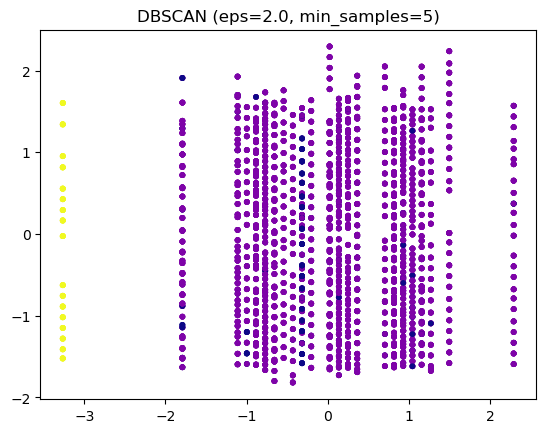

eps=2.0, min_samples=10: Silhouette Score = 0.09, klastry = 4


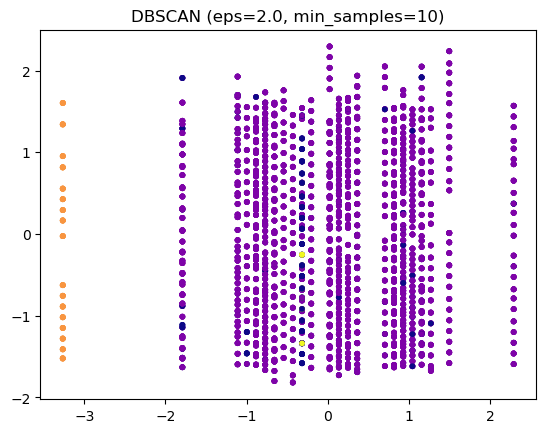

eps=2.5, min_samples=3: Silhouette Score = 0.26, klastry = 11


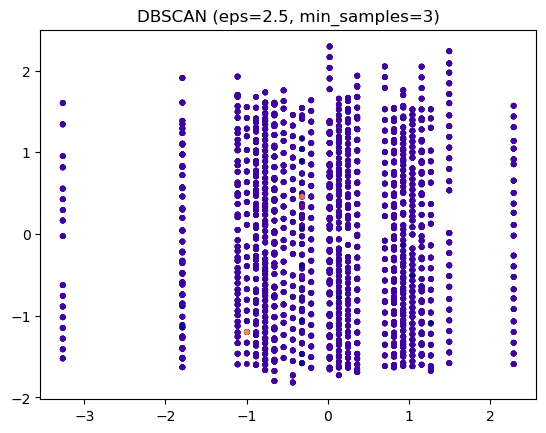

eps=2.5, min_samples=5: Silhouette Score = 0.50, klastry = 3


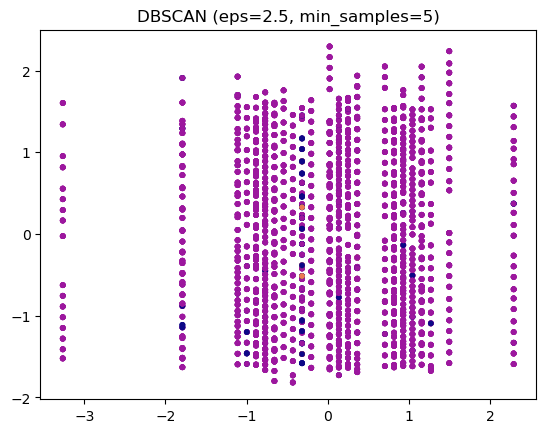

eps=2.5, min_samples=10: Zbyt mało klastrów do oceny


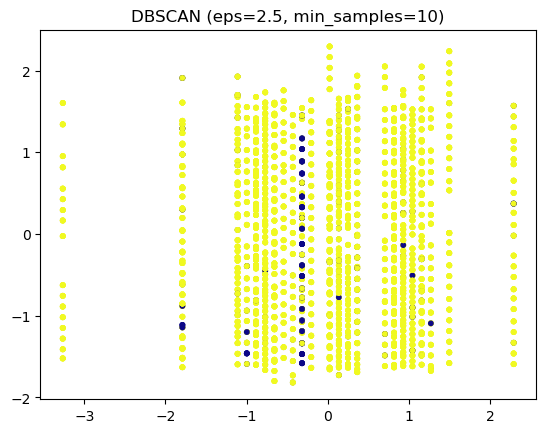

eps=3.0, min_samples=3: Silhouette Score = 0.52, klastry = 6


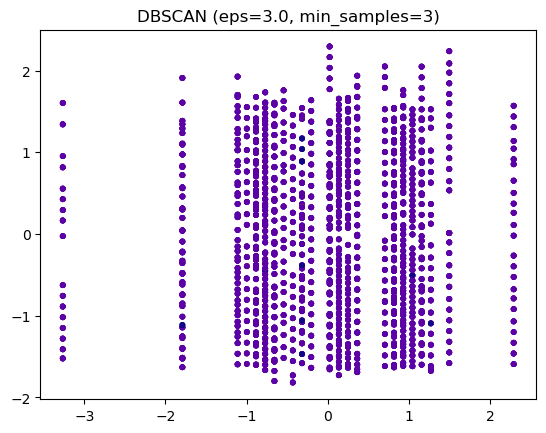

eps=3.0, min_samples=5: Silhouette Score = 0.68, klastry = 2


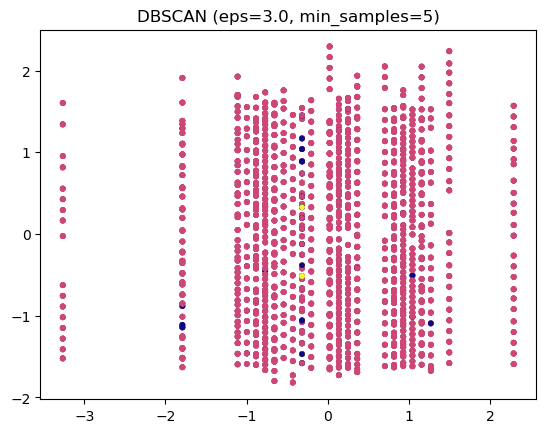

eps=3.0, min_samples=10: Silhouette Score = 0.67, klastry = 2


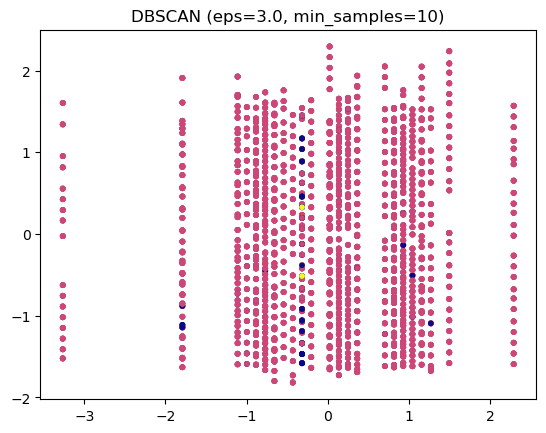

In [15]:
# Ponowne zaimportowanie bibliotek i danych po resecie środowiska
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Ścieżka i kolumny
file_path = "parkinsons_updrs.csv"

# Wczytanie danych
df = pd.read_csv(file_path)

# Przygotowanie danych
X = df.drop(columns=["subject#", "sex"])
X_scaled = StandardScaler().fit_transform(X)

# Zakres wartości do testowania
eps_values = [1.0, 1.5, 2.0, 2.5, 3.0]
min_samples_values = [3, 5, 10]

# Testowanie różnych parametrów DBSCAN
results = []
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            score = silhouette_score(X_scaled, labels)
            results.append((eps, min_samples, n_clusters, score))
            print(f"eps={eps}, min_samples={min_samples}: Silhouette Score = {score:.2f}, klastry = {n_clusters}")
        else:
            print(f"eps={eps}, min_samples={min_samples}: Zbyt mało klastrów do oceny")

        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma', s=10)
        plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
        plt.show()

Porównanie metod (Silhouette Score):
- KMeans: 0.23
- DBSCAN: 0.26
- Agglomerative: 0.47


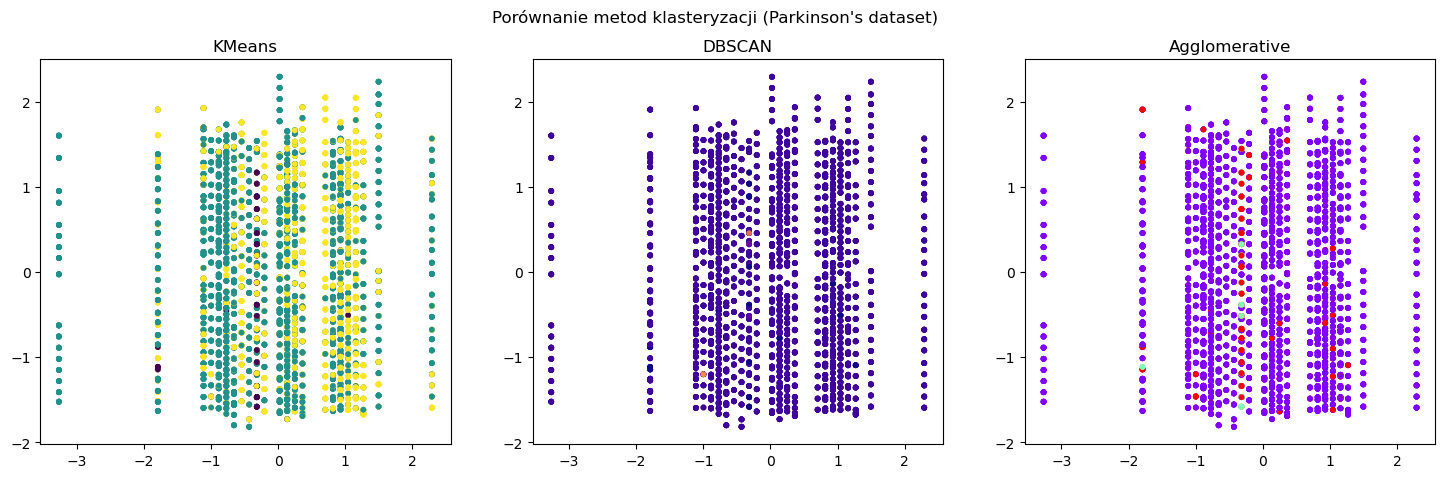

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

X_scaled = StandardScaler().fit_transform(X)

# Klasteryzacja KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = silhouette_score(X_scaled, kmeans_labels)

# Klasteryzacja DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_score = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

# Klasteryzacja Agglomerative
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)
agg_score = silhouette_score(X_scaled, agg_labels)

# Wyniki numeryczne
print("Porównanie metod (Silhouette Score):")
print(f"- KMeans: {kmeans_score:.2f}")
print(f"- DBSCAN: {dbscan_score:.2f}")
print(f"- Agglomerative: {agg_score:.2f}")

# Wizualizacja
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=10)
axs[0].set_title("KMeans")

axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='plasma', s=10)
axs[1].set_title("DBSCAN")

axs[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='rainbow', s=10)
axs[2].set_title("Agglomerative")

plt.suptitle("Porównanie metod klasteryzacji (Parkinson's dataset)")
plt.show()

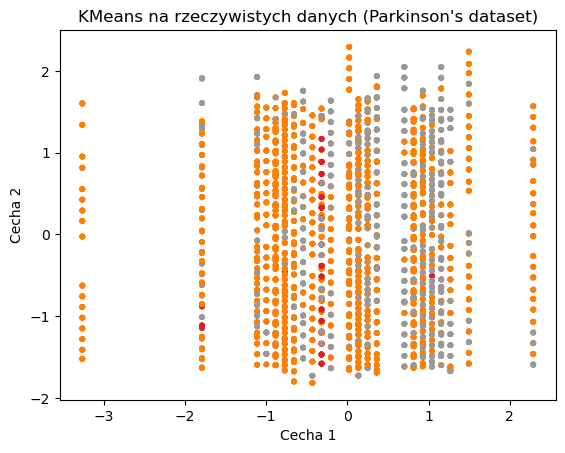

0.23481492816385632

In [18]:
X_scaled = StandardScaler().fit_transform(X)

# Zastosowanie KMeans
kmeans_final = KMeans(n_clusters=3, random_state=0)
final_labels = kmeans_final.fit_predict(X_scaled)
final_score = silhouette_score(X_scaled, final_labels)

# Wizualizacja wyników
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=final_labels, cmap='Set1', s=10)
plt.title("KMeans na rzeczywistych danych (Parkinson's dataset)")
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.show()

final_score
